In [16]:
import pandas as pd
import numpy as np
metrics = pd.read_csv('/data/metrics.csv')
metrics[:30]


FileNotFoundError: File b'/data/metrics.csv' does not exist

In [7]:
metrics.groupby(['node_id', 'http_status']).latency.aggregate(np.mean)

node_id   http_status
10.0.1.1  200            0.047088
          400            0.048214
          500            0.387338
10.1.3.4  200            0.057956
          400            0.059737
          500            0.403446
Name: latency, dtype: float64

In [8]:
metrics.groupby(['node_id', 'http_status']).latency.aggregate(np.percentile, 99.999)

node_id   http_status
10.0.1.1  200            0.068661
          400            0.057935
          500            1.330025
10.1.3.4  200            0.220268
          400            0.162116
          500            1.419507
Name: latency, dtype: float64

In [9]:
metrics.groupby(['http_endpoint', 'http_method']).latency.aggregate(np.percentile, 99)

http_endpoint  http_method
test           GET            0.162706
test1          GET            1.346610
Name: latency, dtype: float64

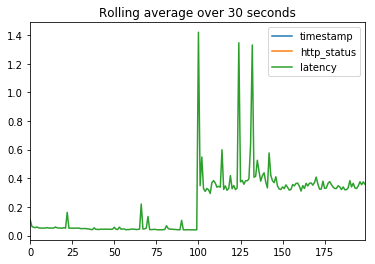

In [12]:
%matplotlib inline
rolling_mean = metrics.rolling(window=5000, center=False, on='latency').mean()
rolling_mean.plot(title='Rolling average over 30 seconds', use_index=True)

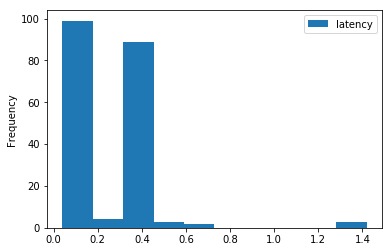

In [13]:
metrics.plot.hist(y='latency')